<a href="https://colab.research.google.com/github/RaphaelNorris/DataSciencProjectAirbnb/blob/main/Airbnb_Cambridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **Data Science Project**
*by [Raphael Norris](https://www.linkedin.com/in/raphael-norris-703a5a143/)*

---

# Análise dos Dados do Airbnb - *Cambridge*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>





 **Neste *notebook*, iremos analisar os dados referentes à cidade, e ver quais insights podem ser extraídos a partir de dados brutos.**


---
<center><img alt="Analisando Airbnb" width="90%" src=https://www.adventurouskate.com/wp-content/uploads/2021/09/Things-to-Do-in-Cambridge-Massachusetts-1024x680.jpg"></center>


---

**Antes de começar a análise exploratória de nossos dados, é imprescindível conhecer um pouco sobre Cambridge. 
Cambridge é uma cidade localizada em Massachusetts, Estados Unidos. Conhecida por abranger as melhores universidades do mundo, destacando a *Universidade de Harvard* e o *MIT (Instituto de Tecnologia de Massachusetts)*. Uma curiosidade em relação a Cambridge e suas universidades de noteriedade mundial é que peelo menos 258 dos 962 ganhadores do Prêmio Nobel do mundo, em algum momento de suas carreiras, foram afiliados a universidades em Cambridge. 
Por isso, Cambridge é conhecida como cidade acadêmica. Outra característica evidente é que praticamente todo o bairro contém pelo menos uma praça pública, para lazer e cultura de todos os residentes.** 

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

from collections import Counter

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ma/cambridge/2021-12-25/visualisations/listings.csv", sep=',')

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,8521,SunsplashedSerenity walk to Harvard & Fresh Pond,306681,Janet,NaN,West Cambridge,42.38258,-71.13646,Entire home/apt,250,2,45,2021-08-29,0.30,2,228,9,C0121120491
1,11169,Lovely Studio Room: Available for up to 14 days,40965,Judy,NaN,North Cambridge,42.39630,-71.13135,Private room,112,3,152,2021-11-14,1.06,3,348,7,NaN
2,11945,Near Harvard: Safe & Lovely Room,40965,Judy,NaN,North Cambridge,42.39416,-71.13232,Private room,82,3,35,2021-05-20,0.24,3,363,1,NaN
3,19581,"Furnished suite, Windsor",74249,Marc And Patty,NaN,The Port,42.36258,-71.09603,Private room,171,10,8,2021-09-11,0.06,3,332,2,NaN
4,26531,CENTRAL LOCATION IN HEART OF CAMBRIDGE,87398,Ari,NaN,Mid-Cambridge,42.37132,-71.11420,Entire home/apt,200,91,4,2018-11-04,0.03,2,365,0,NaN


In [ ]:
# Visualizando a classe e o volume de dados do nosso Data Frame
print('Tipo de dado:', type(df) )
print('Dimensão:', df.shape,
      '\nEntradas:', df.shape[0],
      '\nVariáveis:', df.shape[1])

Tipo de dado: <class 'pandas.core.frame.DataFrame'>
Dimensão: (813, 18) 
Entradas: 813 
Variáveis: 18


## Análise dos Dados


**Dicionário das variáveis**

* ```id:``` Número de *id* do imóvel.
* ```name:```  Título do anúncio.
* ```host_id:```  Número de *id* do anfitrião.
* ```host_name:``` Nome do anfitrião.
* ```neighbourhood_group:``` Oganizações independetes formados por grupos voluntários de determinado bairro.
* ```neighbourhood:``` Nome do bairro.
* ```latitude:``` Coordenada latitudinal do imóvel. 
* ```longitude:``` Coordenada longitudinal do imóvel. 
* ```room_type:```  Informa o tipo de quarto.
* ```price:``` Preço por noite para alugar o imóvel.
* ```minimum_nights:``` Minímo de noites para efetuar a reserva.
* ```number_of_reviews:``` Número de avaliações.
* ```last_review:``` Data da última avaliação.
* ```reviews_per_month:``` Avaliações por mês.
* ```calculeted_host_listings_count:``` Quantidade de imóveis do mesmo anfitrião.
* ```avaliability_365:``` Número de dias disponíveis em um ano. 
* ```number_of_reviews_ltm:``` Número de avaliações nos últimos doze meses (ltm-last twelve months).

* ```license:``` Número da licença da Airbnb, exigido por algumas prefeituras.                


*Nessa análise das variáveis é necessário verificar a compatibilidade lógica com o tipo de cada variável do nosso Data Frame.*

In [ ]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

É interessante colocarmos a variável ```price``` em  ```float```, porque assim, consideramos valores decimais para representar os ***cents*** que podem ser decisivo na escolha  mais barata.

In [ ]:
# Convertendo a variável price de int64 para float
df['price']= df['price'].astype('float')

print('Tipo variável price:', df['price'].dtype)

Tipo variável price: float64


# **Limpando os Dados**

---



Nessa seção, vamos limpar nossos dados para uma melhor análise. Primeiro ponto,
é recomendável utilizar o metódo ```info()```  para obter informações das variáveis como valores nulos, uso de memória e assim como o `display()`, tipo das variáveis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              813 non-null    int64  
 1   name                            813 non-null    object 
 2   host_id                         813 non-null    int64  
 3   host_name                       813 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   813 non-null    object 
 6   latitude                        813 non-null    float64
 7   longitude                       813 non-null    float64
 8   room_type                       813 non-null    object 
 9   price                           813 non-null    float64
 10  minimum_nights                  813 non-null    int64  
 11  number_of_reviews               813 non-null    int64  
 12  last_review                     598 

In [ ]:
# Para imprimir em porcentagem os valores ausentes, é viável
# ordenar de maneira decrescente para uma melhor visualização dos dados, assim, 
# vamos utilizar o método sort_values() com atributo ascending = False.

(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            65.190652
reviews_per_month                  26.445264
last_review                        26.445264
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64


 *  Observando a quantidade de valores ausentes em cada variável, fica fácil notar que a série ```neighbourhood_group``` contém em 100% de suas entradas valores ausentes. Essa variável indica grupos comunitários formados para discussões locais, portanto, não é de preenchimento obrigatório para anfitrião e não afeta de maneira objetiva a escolha de um hóspede, já que o conhecimento da existência desses grupos não é de ciência de todos.


 
* `license` com um pouco mais de 65% de suas linhas com valores ausentes justificáveis por não ser exigidas a todos hosts ao anunciar seu imóvel na Airbnb, ou ainda, o anfitrião iniciou o processo de registro mas não recebeu ainda sua licença. E por fim, o anfitrião pode ser isento de licença por pretextos determinado pelo orgão público responsável. 

* `reviews_per_month` e `last_review` também merecem atenção, já que 26.5% aproximadamente tem valores ausentes e suas linhas. Ambas estão relacionadas com as avaliações, sendo a primeira a quantidade por mês e a segunda a data da última avaliação. Logo, é possível a ausência de valores, levando em conta a facultatividade da avaliação.
Como o número de avaliações potencializa ou desvaloriza a divulgação de um imóvel, e a quantidade de valores ausentes não são excessivos, optei por manter para visualizar a relação com as propriedades disponíveis.




In [ ]:
# Vamos excluir a coluna neighbourhood_group , já que 100% dos seus valores 
# são ausentes. Também irei excluir  a variável license, porque ela é indiferen-
# te para nossa análise. Até para uma melhor precisão do calculo de medidas
# estatísticas.

df.drop(columns = ['neighbourhood_group', 'license'],inplace=True)


Nos casos de `reviews_per_month` e `last_review`, vamos completar o NaN com zero.

In [ ]:
df.fillna(0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              813 non-null    int64  
 1   name                            813 non-null    object 
 2   host_id                         813 non-null    int64  
 3   host_name                       813 non-null    object 
 4   neighbourhood                   813 non-null    object 
 5   latitude                        813 non-null    float64
 6   longitude                       813 non-null    float64
 7   room_type                       813 non-null    object 
 8   price                           813 non-null    float64
 9   minimum_nights                  813 non-null    int64  
 10  number_of_reviews               813 non-null    int64  
 11  last_review                     813 non-null    object 
 12  reviews_per_month               813 

In [ ]:
# Agora, temos nossos dados 'completos' sem valores ausentes,
# como mostrado abaixo:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Foram excluídos os valores ausentes, com isso, é necessário explanar estatísticas descritivas para uma análise inicial.

In [ ]:
df.describe().round(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,813.00,8.130000e+02,813.00,813.00,813.00,813.00,813.00,813.00,813.00,813.00,813.00
mean,29132434.71,1.070961e+08,42.37,-71.11,176.07,31.42,51.15,1.10,11.70,191.40,8.69
std,17782045.21,1.265789e+08,0.01,0.02,141.80,37.36,88.88,1.67,18.29,133.46,16.49
min,8521.00,2.307800e+04,42.35,-71.16,22.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,13294153.00,1.257623e+07,42.36,-71.12,88.00,2.00,0.00,0.00,1.00,70.00,0.00
50%,29778001.00,4.501130e+07,42.37,-71.11,151.00,30.00,8.00,0.33,4.00,203.00,1.00
75%,46660533.00,1.597288e+08,42.38,-71.10,220.00,32.00,62.00,1.61,14.00,327.00,8.00
max,53938020.00,4.302093e+08,42.40,-71.07,1650.00,300.00,635.00,14.27,68.00,365.00,126.00


Observa-se a disparidade entre o terceiro quartil com a máxima de `price` e `minimum_nights`. São saltos que merecem atenção, dependendo da frequência desses valores extremos.

Outras variáveis também apresentam diferenças consideráveis entre os quartis, portanto, devemos levar em conta o senso comum e buscar explicações para esse valores. Por exemplo, ` number_of_reviews`, trata-se da quantidade avaliações que uma propriedade possui. Portanto, isso pode variar em relação ao tempo na plataforma, quantidade de hóspedes por mês/ano. Ou seja, depende de outros fenômenos para uma análise e conclusão concisa. E ainda, nosso objetivo é analisar os preços dos bairros e tipos de imóveis em Cambridge.

Para uma análise razoável, é preferível dados expostos visualmente. Então, será apresentado histograma de cada série.





# Analisando oss histogramas e suas distribuições

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f803adfd050>,
      dtype=object)

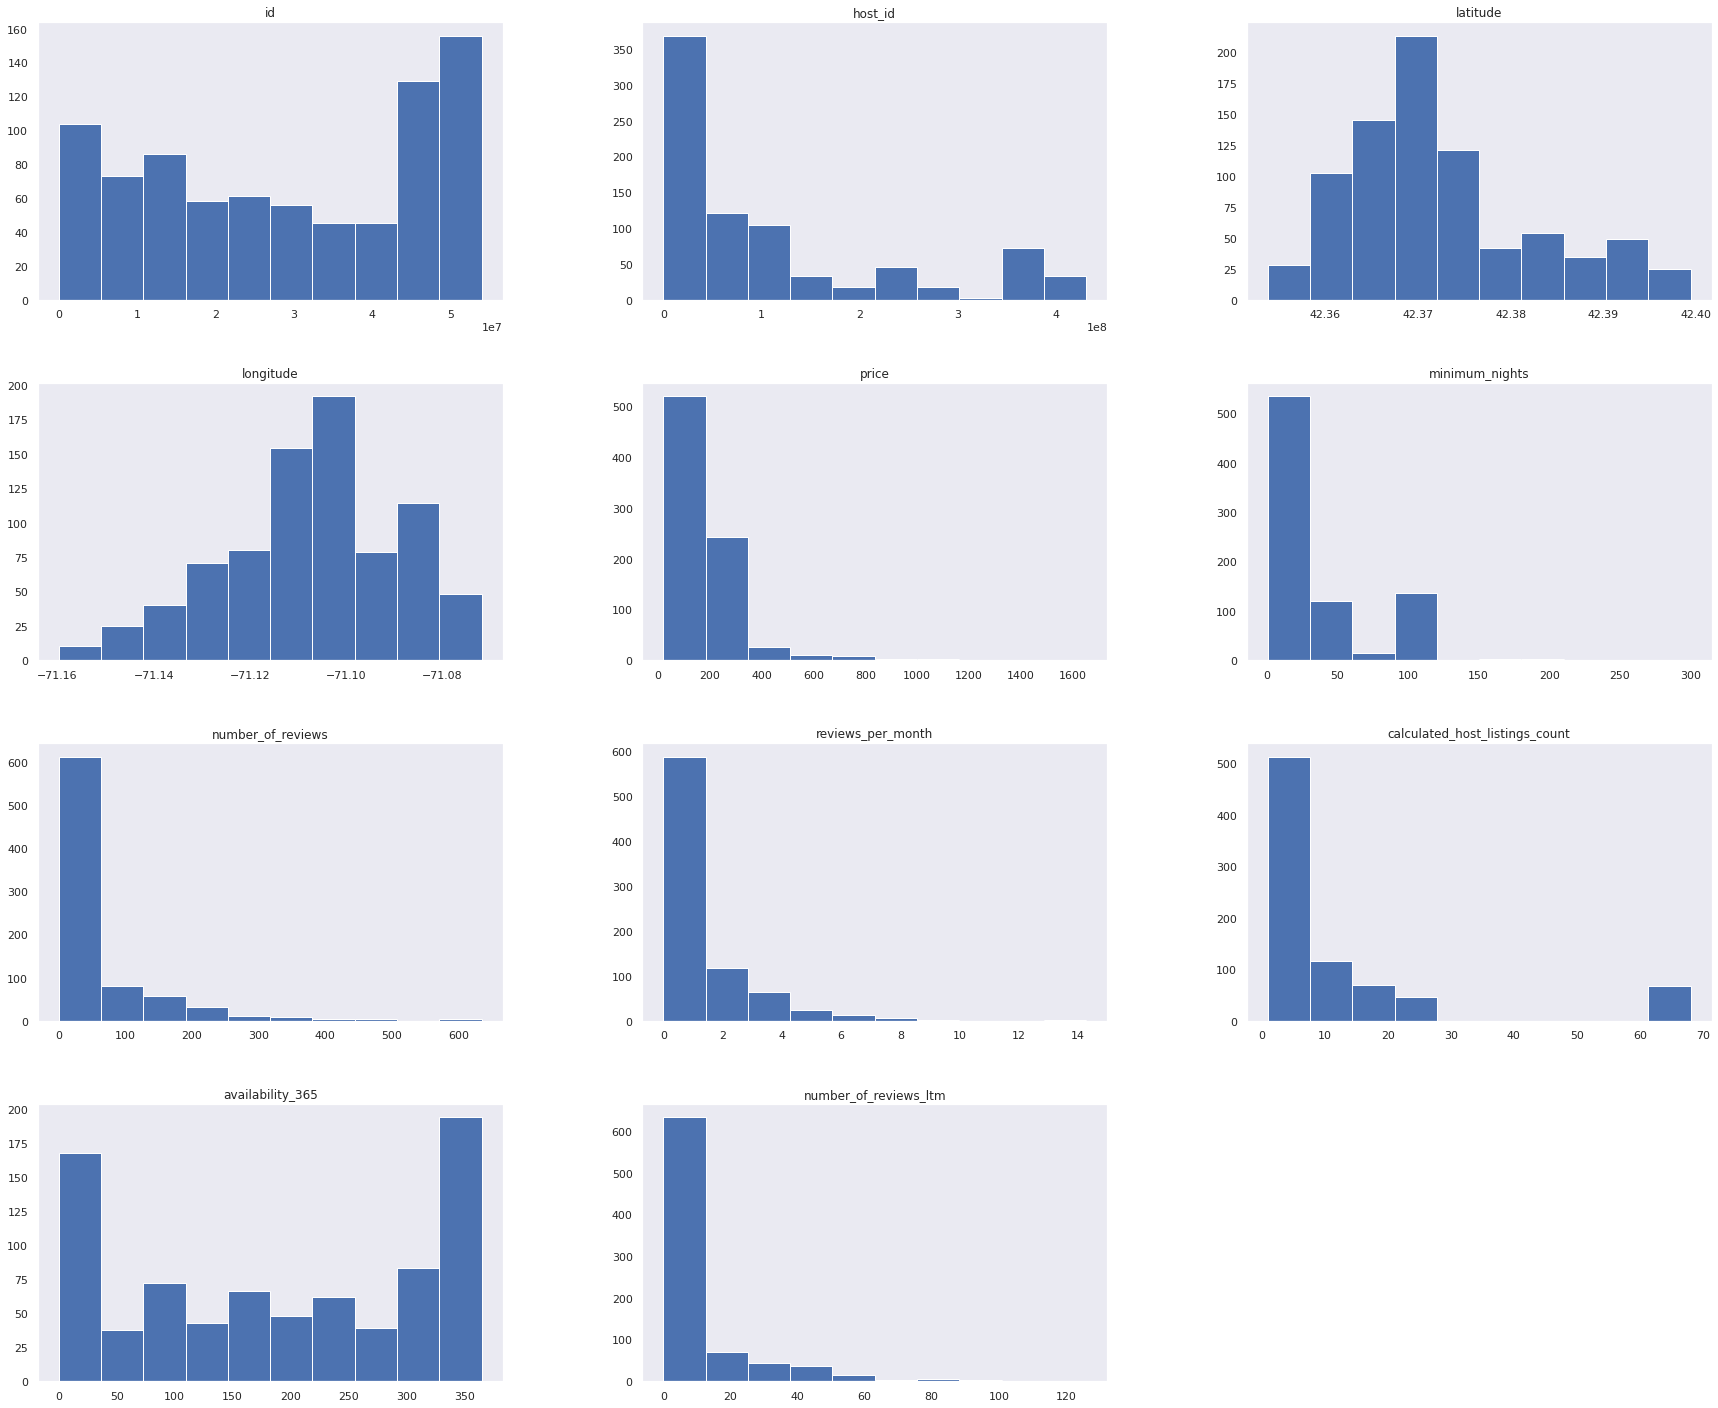

In [ ]:
df.hist(bins=10, figsize=(30,25), grid= False)

Como foi abordado anteriormente, serão examinados para fins analíticos o histograma de ` price ` e `minimum_nights`.







# Análise e Limpeza - `Price`

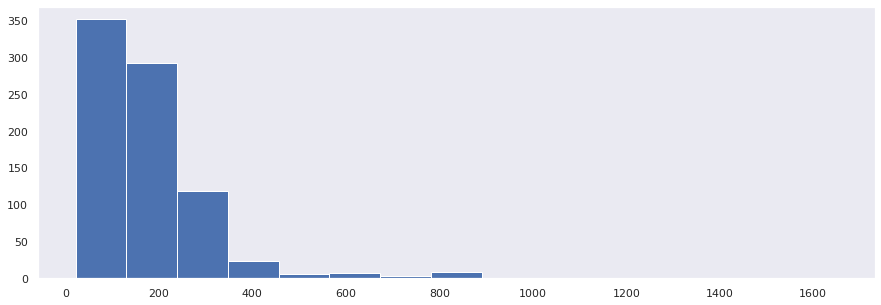

In [ ]:
df.price.hist(bins=15, figsize=(15,5), grid= False);

As informações contidas nesse histograma pode ser interpretada em **box plot**. O Boxplot descreve características dos nossos conjuntos de dados mais resistentes a erros de observações e valores atípicos. Sendo essas características:


*   Posição central que é dada pela `mediana`;
*   Medida de `disperção` entre o quarto superior e inferior;
*   `Assimetria` pela posição relativa dos quartis;
*   Identificação de `outliers` e `valores atípicos`.




In [ ]:
# Primeiro e Terceiro quartil-price
q1_price=df.price.quantile(.25)
q3_price=df.price.quantile(.75)
IQR_price = q3_price-q1_price


#Limite superior e inferior-price
sup_price= q3_price + 1.5*IQR_price
inf_price= q1_price - 1.5*IQR_price
print('IQR da variável price:', IQR_price)
print('Limite superior:', sup_price)
print('Limite inferior:', inf_price)


IQR da variável price: 132.0
Limite superior: 418.0
Limite inferior: -110.0


### ***Plotando nosso diagrama***-`Price`

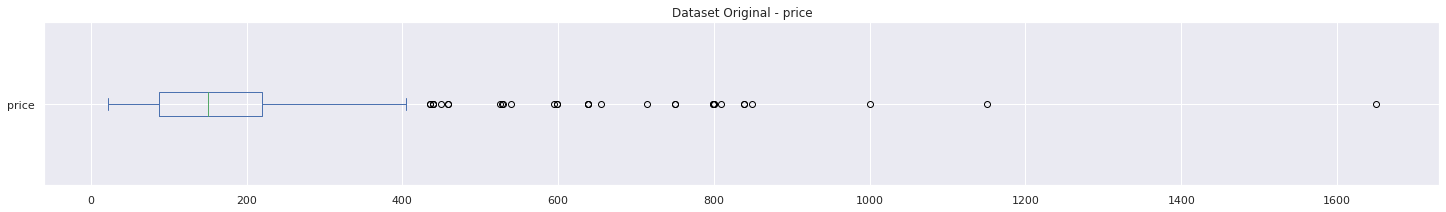

O Dataset possui 813 colunas
33 Entradas acima de 418.0
Representam 4.06% do dataset


In [ ]:
fig, ax = plt.subplots(figsize=(25,3))
df.price.plot(kind='box', vert= False );
ax.set_title("Dataset Original - price")
plt.show()

print('O Dataset possui {} colunas'.format(df.shape[0]))
print('{} Entradas acima de 418.0'.format(len(df[df.price>418])))
print('Representam {:.2f}% do dataset'.format((len(df[df.price>418.0])/df.shape[0])*100))


Ora, no caso da variável `price`, temos valores fora do limite superior e inferior. Já que trata-se de valores reais de uma diária, não seria ideal considerarmos como outiliers mas sim valores exteriores.

*Lembre-se que outiliers é dado por um erro de observação ou arredondamento.*


Outro ponto que merece destaque é que não temos preços de diárias negativas e iguais a zero, ou seja, a definição de outiliers vale para os preços < ou = a 0.


In [ ]:
#limpando o dataset de valores exteriores e outiliers

df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 418.0].index, axis = 0, inplace = True)

df_clean.drop(df_clean[df_clean.price == 0.0].index, axis = 0, inplace= True)

print('Shape antes da limpeza: ', df.shape)
print('Shape depois da limpeza: ', df_clean.shape)


Shape antes da limpeza:  (813, 16)
Shape depois da limpeza:  (780, 16)


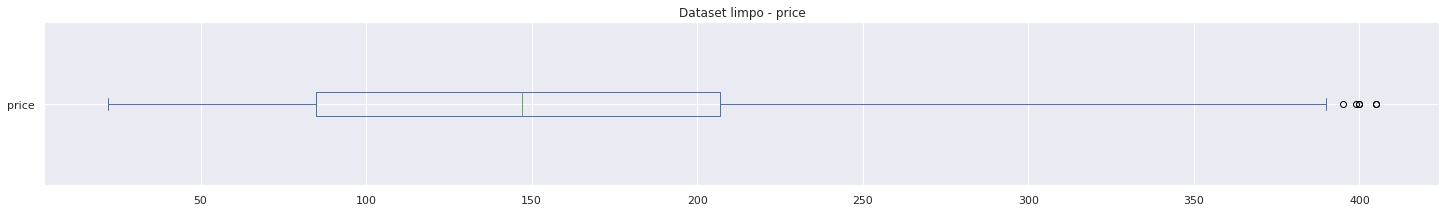

O Dataset Original possui 813 colunas
O Dataset limpo possui 780 colunas
Foram limpos 33 colunas


In [ ]:
fig, ax = plt.subplots(figsize=(25,3))
df_clean.price.plot(kind= 'box', vert = False)
ax.set_title("Dataset limpo - price")
plt.show()

print('O Dataset Original possui {} colunas'.format(df.shape[0]))

print('O Dataset limpo possui {} colunas'.format(df_clean.shape[0]))

print('Foram limpos {} colunas'.format(df.shape[0] - df_clean.shape[0]))



In [ ]:
df_clean.describe().round(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,780.00,7.800000e+02,780.00,780.00,780.00,780.00,780.00,780.00,780.00,780.00,780.00
mean,29406961.17,1.085099e+08,42.37,-71.11,154.56,31.11,52.21,1.14,12.02,190.26,8.89
std,17876030.92,1.283736e+08,0.01,0.02,83.59,37.38,89.81,1.69,18.59,132.98,16.68
min,8521.00,2.307800e+04,42.35,-71.16,22.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,13174040.75,1.257623e+07,42.36,-71.12,85.00,2.00,0.00,0.00,1.00,69.75,0.00
50%,30389911.50,4.501130e+07,42.37,-71.11,147.00,30.00,8.00,0.36,4.00,202.50,1.00
75%,46777988.25,1.627054e+08,42.38,-71.10,207.00,32.00,63.25,1.66,14.00,326.00,8.00
max,53938020.00,4.302093e+08,42.40,-71.07,405.00,300.00,635.00,14.27,68.00,365.00,126.00


In [ ]:
# ver a média da coluna `price``
print('Valor da média da coluna price:',df_clean.price.mean())

Valor da média da coluna price: 160.24451410658307


# Análise e limpeza - `Minimum_Nights`




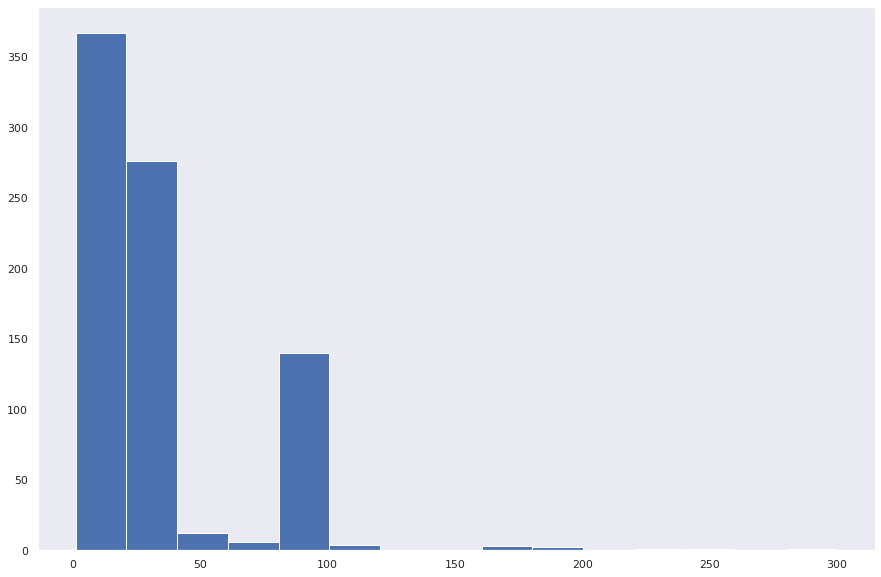

In [ ]:
df.minimum_nights.hist(bins=15, figsize=(15,10), grid=False )

Pelo Histograma conseguimos visualizar que há valores atípicos em nossos dados.

In [ ]:
q1_minimumnights=df.minimum_nights.quantile(.25)
q3_minimumnights=df.minimum_nights.quantile(.75)
IQR_minimumnights = q3_minimumnights-q1_minimumnights


#Limite superior e inferior
sup_minimumnights= q3_minimumnights + 1.5*IQR_minimumnights
inf_minimumnights= q1_minimumnights - 1.5*IQR_minimumnights
print('IQR da variável minimum_nights:', IQR_minimumnights)
print('Limite superior:', sup_minimumnights)
print('Limite inferior:', inf_minimumnights)


IQR da variável minimum_nights: 30.0
Limite superior: 77.0
Limite inferior: -43.0


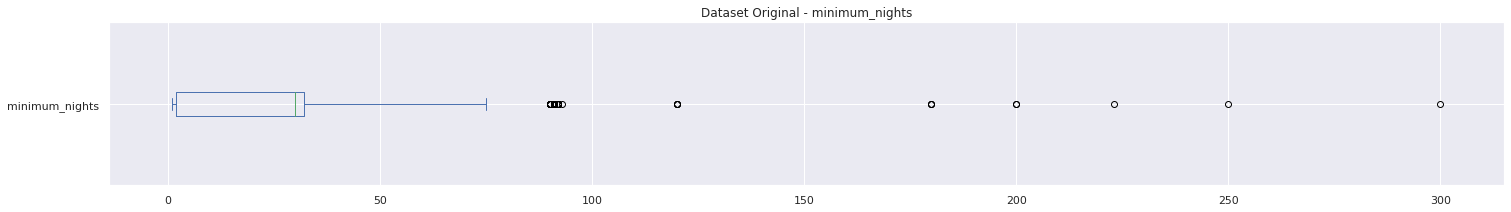

O Dataset possui 813 colunas
152 Entradas acima de 77.0
Representam 18.70% do dataset


In [ ]:
fig, ax = plt.subplots(figsize=(25,3))
df.minimum_nights.plot(kind='box', vert= False );
ax.set_title("Dataset Original - minimum_nights")
plt.show()

print('O Dataset possui {} colunas'.format(df.shape[0]))
print('{} Entradas acima de 77.0'.format(len(df[df.minimum_nights > 77.0])))
print('Representam {:.2f}% do dataset'.format((len(df[df.minimum_nights > 77.0])/df.shape[0])*100))

Dessa forma, 18.70% de entradas atípicas, é uma parcela anormal de nossos dados. Porém, precisamos utilizar o bom senso que o minímo de noites maiores que 77 são observações as quais fogem da realidade de uma plataforma com o propósito em oferecer hospedagem para viajantes. 


In [ ]:
# Excluindo valores extremos da série minimum_nights

df_clean.drop(df_clean[df_clean.minimum_nights > 77.0].index, axis = 0, inplace = True)

df_clean.drop(df_clean[df_clean.minimum_nights == 0.0].index, axis = 0, inplace= True)

print('Shape antes da limpeza: ', df.shape)
print('Shape depois da limpeza: ', df_clean.shape)


Shape antes da limpeza:  (813, 16)
Shape depois da limpeza:  (638, 16)


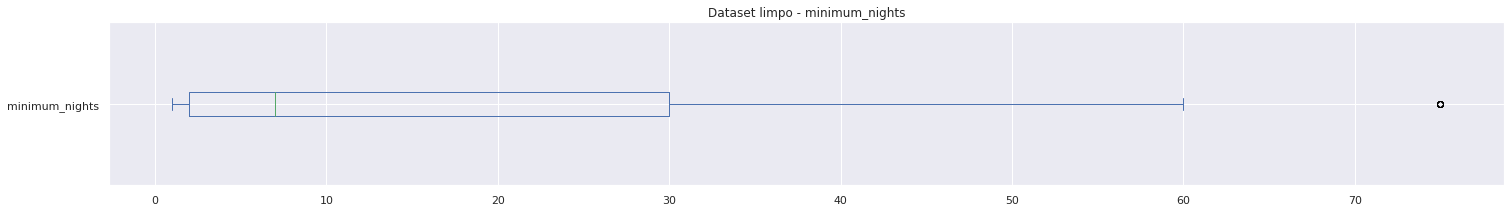

O Dataset Original possui 813 colunas
O Dataset limpo possui 638 colunas
Foram limpos 175 colunas


In [ ]:
fig, ax = plt.subplots(figsize=(25,3))
df_clean.minimum_nights.plot(kind= 'box', vert =False)
ax.set_title("Dataset limpo - minimum_nights")
plt.show()

print('O Dataset Original possui {} colunas'.format(df.shape[0]))
print('O Dataset limpo possui {} colunas'.format(df_clean.shape[0]))
print('Foram limpos {} colunas'.format(df.shape[0] - df_clean.shape[0]))

In [ ]:
df_clean.describe().round(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,638.00,6.380000e+02,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00,638.00
mean,29095380.76,1.005813e+08,42.37,-71.11,160.24,16.03,62.08,1.36,13.32,180.08,10.84
std,17943938.98,1.215497e+08,0.01,0.02,84.59,16.02,96.12,1.79,20.05,130.86,17.87
min,8521.00,4.096500e+04,42.35,-71.16,22.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,13092235.75,1.257623e+07,42.36,-71.12,90.00,2.00,1.00,0.08,2.00,50.00,0.00
50%,30058481.00,4.501130e+07,42.37,-71.11,155.00,7.00,14.50,0.62,4.00,181.00,2.00
75%,46828100.75,1.128680e+08,42.38,-71.10,217.00,30.00,86.00,2.08,15.00,310.00,16.00
max,53938020.00,4.302093e+08,42.40,-71.07,405.00,75.00,635.00,14.27,68.00,365.00,126.00


In [ ]:
# ver a média da coluna minimum_nights
print('Valor da média da coluna minimum_nights:',df_clean.minimum_nights.mean())

Valor da média da coluna minimum_nights: 16.03291536050157


Com os dados livres de erros de observações, é interessante verificar a relação entre as variáveis do nosso dataset. Com esse propósito, a biblioteca `seaborn` proporciona o uso do mapa de correlação de calor, denominado de `heatmap`.Esse modelo de mapa consiste por meio da cor e do coeficiente de correlação, expor o quanto uma variável afeta a outra.
Para fins de consistência de dados, criar uma matriz de correlação com intuito de obter informações análiticas e trabalhar concomitamente com os gráficos de calor, potencializa a analogia de dados.


In [ ]:
# criar uma matriz de correlação
correlação = df_clean[['price', 'minimum_nights', 'number_of_reviews', 
                       'reviews_per_month', 'calculated_host_listings_count', 
                       'availability_365','number_of_reviews_ltm' ]].corr()

display(correlação)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.143292,-0.145773,-0.247901,0.255785,-0.030826,-0.235881
minimum_nights,0.143292,1.000000,-0.368676,-0.441106,0.358689,0.265224,-0.475132
number_of_reviews,-0.145773,-0.368676,1.000000,0.696877,-0.312525,-0.050640,0.622844
reviews_per_month,-0.247901,-0.441106,0.696877,1.000000,-0.335499,-0.099253,0.794347
calculated_host_listings_count,0.255785,0.358689,-0.312525,-0.335499,1.000000,0.200949,-0.280567
availability_365,-0.030826,0.265224,-0.050640,-0.099253,0.200949,1.000000,-0.008596
number_of_reviews_ltm,-0.235881,-0.475132,0.622844,0.794347,-0.280567,-0.008596,1.000000


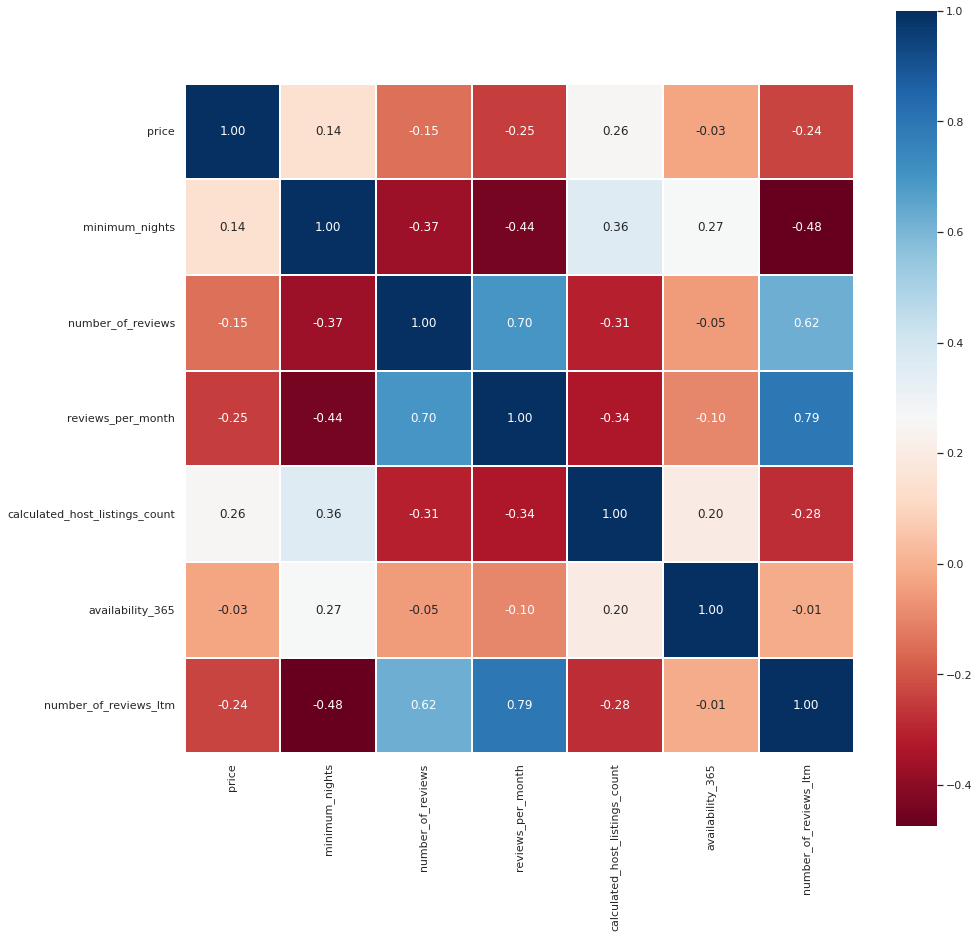

In [ ]:
sns.heatmap(correlação, cmap='RdBu', fmt='.2f', square=True, linewidths=1, linecolor='white', annot=True) 

Em um heatmap, quanto mais próximo o coeficiente de correlação for de 1, ela será diretamente proporcional e as que se aproximam de -1, são inversamente proporcional. Portanto, nessa é visível a relação entre a quantidade avaliações por mês com a avaliação nos últimos meses, bem próximo de 1. É lógico, quanto maior a quantidade de avaliações por mês, maior será a quantidade de avaliações em um ano.

Outra correlação notável é entre a `availability_365` e `minimum_nights`, ou seja, quanto maior o minímo de noites exigidas para a reserva, maior sua disponibilidade em 365 dias.

Relacionando `number_of_reviews`(por mês, em doze meses e o total) com availabitity_365, testemunhamos um conflito entre esses objetos, já que o número de avaliações pode estar diretamente ligado a disponibilidade do imóvel. Ah, mas é óbvio já que os valores estão longe de +1, ou seja, quanto maior o número de avaliações, menor a disponibilidade porque passa confiabilidade para o cliente. Em contrapartida é que as avaliações podem ser positivas ou negativas, por isso os coeficientes de correlação não estão muito distantes de +1.






### *Tipos de propriedades disponíveis no Airbnb*

Quantidade de tipos de imóveis: 3
Entire home/apt    386
Private room       251
Shared room          1
Name: room_type, dtype: int64


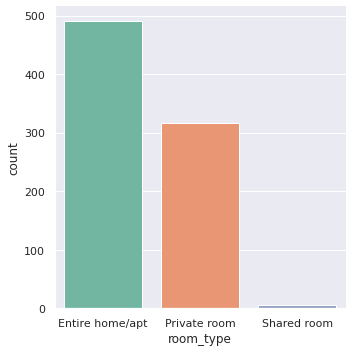

In [ ]:
print('Quantidade de tipos de imóveis:', len(df_clean['room_type'].unique()))
print(df_clean['room_type'].value_counts())

sns.catplot(x = "room_type", data = df, kind = "count", palette="Set2")

In [ ]:
df_clean.groupby(['room_type']).price.mean().sort_values(ascending = False)

room_type
Entire home/apt    196.183938
Private room       105.454183
Shared room         40.000000
Name: price, dtype: float64

In [ ]:
(df_clean.room_type.value_counts()/ df_clean.shape[0])*100

Entire home/apt    60.501567
Private room       39.341693
Shared room         0.156740
Name: room_type, dtype: float64

Como podemos ver, a maioria são casas ou apartamentos completos.
Em segundo lugar, quartos privados e por último, quarto compartilhado. A fim de obter insights sobre os preços em relação aos bairros e o tipo de imóvel, será necessário plotar um heatmap relacionando-os.


# Principais características dos bairros de Cambridge
Referência no site da [Prefeitura de Cambridge.](https://www.cambridgema.gov/CDD)

---

Características que podem justificar valores e tipos de propriedades disponíveis.

---


`Agassiz:` em 2021, o bairro de Agassiz foi renomeado como Baldwin. Contém instalações de moradias das universidades de Harvard e Lesley.


`Área 2/MIT:` é quase inteiramente ocupada pelo campus do Massachusetts Institute of Technology (MIT).A grande maioria dos residentes do bairro são estudantes de graduação ou pós-graduação que vivem em dormitórios ou fraternidades do MIT.

`Cambridgeport:` uma quantidade significativa de novos desenvolvimentos, incluindo novos usos de varejo, escritório/laboratório, residencial e institucional, tem ocorrido dentro da antiga área industrial ao longo da borda sudeste do bairro.

`East Cambridge: `contém hotéis, edifícios de apartamentos de luxo, empresas de alta tecnologia, um shopping regional e o Museu de Ciência de Boston.

`Mid-Cambridge:` Muitas instituições têm presença em Mid-Cambridge, incluindo Harvard University, Cambridge Hospital, Youville Hospital, Cambridge Public Library e Cambridge City Hall.

` Neighborhood Nine: ` A Universidade de Harvard é uma presença no bairro, com instalações de moradia acadêmica e estudantil. Danehy Park, uma instalação de atletismo e recreação de 50 acres construída no local do antigo aterro sanitário da cidade, também está localizada no Bairro Nove.

`North Cambridge:`é um bairro de mais de onze mil moradores que vivem em tipos de moradias que vão desde casas individuais e multifamiliares até grandes edifícios de apartamentos

`Riverside:`Grande parte da moradia estudantil da Universidade de Harvard está localizada em Riverside. Riverside também abriga algumas das instalações acadêmicas de Harvard e a principal instalação acadêmica e administrativa da Cambridge College.

`Cambridge Highlands:` Dividido em uma parte industrial e comercial, e uma parte residencial.

` Strawberry Hill :`é o menor bairro por área terrestre em Cambridge. Strawberry Hill é principalmente residencial, e inclui casas multifamiliares e alguns edifícios de apartamentos.

`The Port:`A maior parte do The Port tem caráter residencial.

`Wellington Harrington :`é um pequeno bairro residencial de alta densidade.

`West Cambridge: ` é um bairro residencial relativamente de baixa densidade.






In [ ]:
# Bairros com maiores médias de preços em ordem decrescente
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Area 2/MIT               197.954545
East Cambridge           191.282353
Mid-Cambridge            176.380435
Cambridge Highlands      166.285714
Agassiz                  163.535714
West Cambridge           163.326087
The Port                 157.440000
Riverside                156.342105
Neighborhood Nine        152.358974
Strawberry Hill          148.307692
Cambridgeport            144.827586
North Cambridge          143.290323
Wellington-Harrington    114.454545
Name: price, dtype: float64

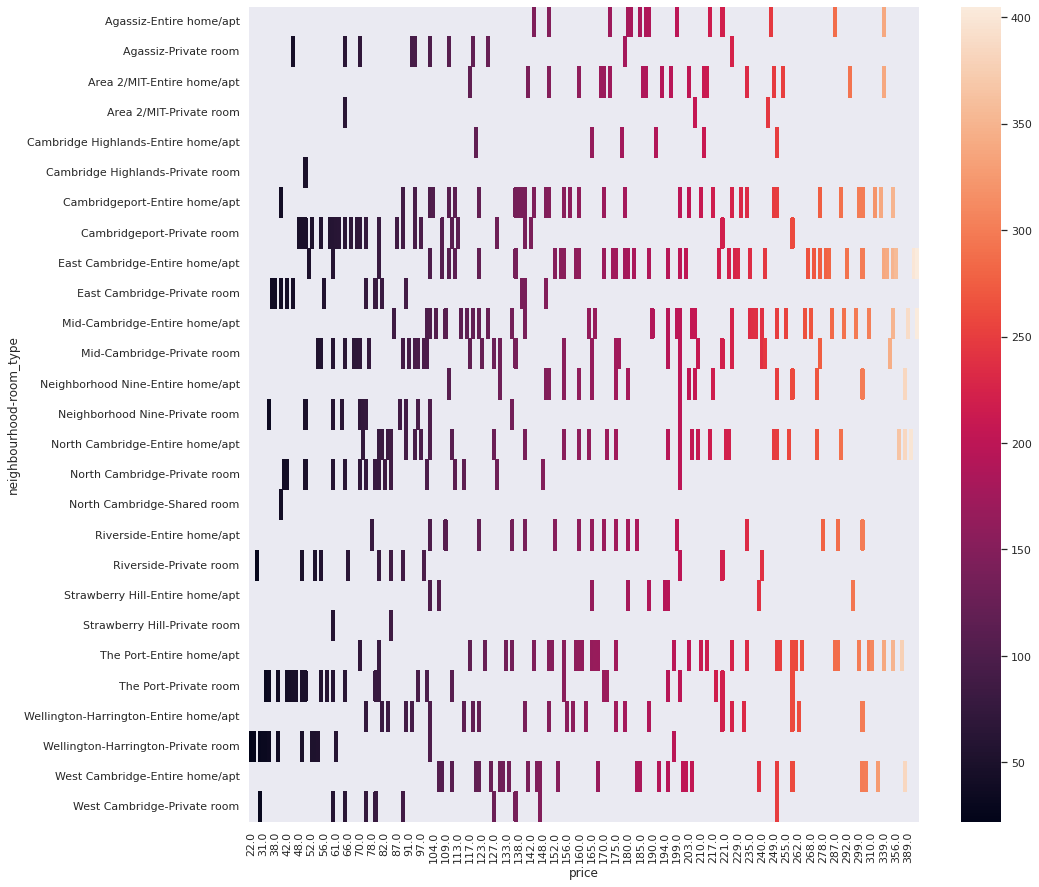

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(df_clean.groupby(['neighbourhood', 'room_type','price']).price.mean().unstack())

Nesse heatmap, é possível extrair alguns insights. Citando o bairro` Strawberry Hill` que é o menor bairro em área de Cambridge e por isso possui poucas unidades de hotelaria. Outro bairro é `Cambridge Highlands` que em sua maior parte territórial é para indústria e comércio, logo, há poucos alojamentos.

A `Area2/MIT` por ser ocupada pelo campus do MIT, a maioria dos valores estão acima da média em relação a média dos tipos de alojamentos. O local é foco de viajantes do mundo inteiro, já que MIT é referência na área acadêmico e projetos. 





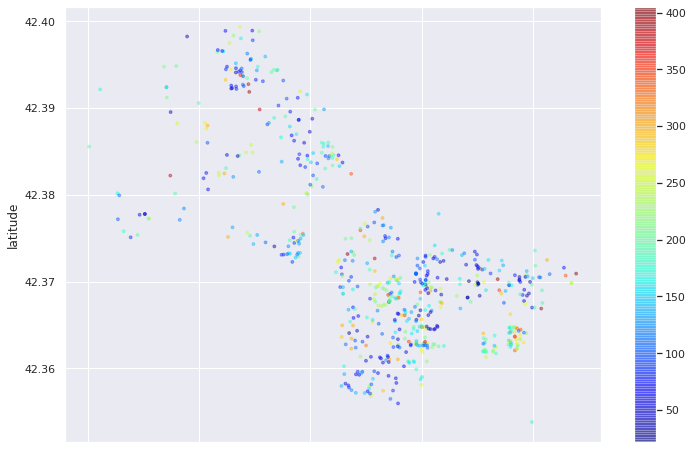

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
                   c = df_clean.price , s = 8, cmap = plt.get_cmap('jet'), figsize
                    = (12,8));

## Conclusões


Em virtude dos dados e análise feita ao longo desse notebook, vimos que as propriedades de Cambridge no Airbnb possui em sua maioria casas ou apartamentos completos para alugar. Ainda, há um volume grande de quartos privados.

O maior preço médio é da Area2 que reside em sua maioria estudantes do MIT, o seu valor pode estar associado a sua localização e a ausência de propriedades locáveis.

Por fim, Cambridge por ser uma cidade com grandes universidades, deve receber diariamente viajantes do mundo todo, para conhcer, participar de eventos, congressos e cursos nessas instituições. 

Com esses dados, um anfitrião consegue visualizar o quanto o seu imóvel estar acima ou abaixo da média, estimulando insights para modificações que venham beneficia-lo. Esses dados é útil para os hóspedes também, que conseguem visualizar os bairros com maiores médias de preços e o tipo de imóvel mais viável para sua jornada.

A outras variáveis que não abordamos nessa análise exploratória mas agregam valor como estrutura e quantidade de cômodos.
